In [2]:
import pandas as pd

# Load the traffic count data
traffic_count_df = pd.read_csv('../count/THINGS WE DID/merged_traffic_count_with_coordinates.csv')

# Load the accident data
accident_df = pd.read_csv('../accidents/puf Äùàûÿ.csv', encoding='ISO-8859-8')

# Display the first few rows of each dataset
print("Traffic Count Data:")
print(traffic_count_df.head())

print("\nAccident Data:")
print(accident_df.head())


Traffic Count Data:
   shnat_seker  kvish  keta  maslul  hodesh  yom  yom_bashavua  shaa  \
0         2021      1    20       1       7    6             3     0   
1         2021      1    20       1       7    6             3     1   
2         2021      1    20       1       7    6             3     2   
3         2021      1    20       1       7    6             3     3   
4         2021      1    20       1       7    6             3     4   

   kamut_kle_rehev         X         Y  
0             1486  183772.0  657940.0  
1             1170  183772.0  657940.0  
2              795  183772.0  657940.0  
3              601  183772.0  657940.0  
4             1134  183772.0  657940.0  

Accident Data:
   pk_teuna_fikt  sug_tik  THUM_GEOGRAFI  SUG_DEREH  SEMEL_YISHUV  REHOV1  \
0     2020031644        1              1          1          1061   159.0   
1     2020079871        1              1          4             0     NaN   
2     2020081980        1              1          1   

In [13]:
import pandas as pd

# Rename columns for consistency
accident_df.rename(columns={'HODESH_TEUNA': 'hodesh', 'SHAA': 'shaa'}, inplace=True)

# Aggregate traffic data by road segment, month, and day
aggregated_traffic_df = traffic_count_df.groupby(['kvish', 'keta', 'hodesh', 'yom']).agg({'kamut_kle_rehev': 'mean'}).reset_index()

# Merge the aggregated traffic data with the accident data using KVISH1
merged_df_kvish1 = pd.merge(accident_df, aggregated_traffic_df, left_on=['KVISH1', 'hodesh', 'YOM_BASHAVUA'], right_on=['kvish', 'hodesh', 'yom'], how='inner')

# Merge the aggregated traffic data with the accident data using KVISH2
merged_df_kvish2 = pd.merge(accident_df, aggregated_traffic_df, left_on=['KVISH2', 'hodesh', 'YOM_BASHAVUA'], right_on=['kvish', 'hodesh', 'yom'], how='inner')

# Combine both results
merged_df = pd.concat([merged_df_kvish1, merged_df_kvish2]).drop_duplicates().reset_index(drop=True)

# Display the merged DataFrame
print(merged_df.all)


<bound method DataFrame.all of      pk_teuna_fikt  sug_tik  THUM_GEOGRAFI  SUG_DEREH  SEMEL_YISHUV  REHOV1  \
0       2021000384        1              1          4             0     NaN   
1       2021000384        1              1          4             0     NaN   
2       2021000928        1              1          4             0     NaN   
3       2021001234        1              1          4             0     NaN   
4       2021001234        1              1          4             0     NaN   
..             ...      ...            ...        ...           ...     ...   
888     2021094349        1              1          3             0     NaN   
889     2021094349        1              1          3             0     NaN   
890     2021094349        1              1          3             0     NaN   
891     2021096395        1              1          3             0     NaN   
892     2021099064        1              1          3             0     NaN   

     REHOV2  BAYIT  

In [9]:
correlation = merged_df['kamut_kle_rehev'].corr(merged_df['HUMRAT_TEUNA'])
print(f"Correlation between traffic volume and accident severity: {correlation}")


Correlation between traffic volume and accident severity: 0.14700817558122994


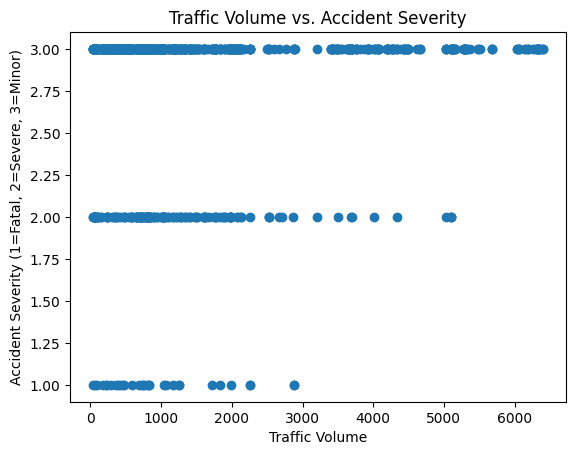

In [10]:
import matplotlib.pyplot as plt

# Scatter plot of traffic volume vs. accident severity
plt.scatter(merged_df['kamut_kle_rehev'], merged_df['HUMRAT_TEUNA'])
plt.xlabel('Traffic Volume')
plt.ylabel('Accident Severity (1=Fatal, 2=Severe, 3=Minor)')
plt.title('Traffic Volume vs. Accident Severity')
plt.show()


In [14]:
# Check if the merged data has the necessary geographic coordinates
print(merged_df[['X', 'Y']].head())


          X         Y
0  199463.0  621415.0
1  199463.0  621415.0
2  183528.0  658855.0
3  179491.0  531672.0
4  179491.0  531672.0


In [16]:
# Export the merged DataFrame to a CSV file
merged_df.to_csv('./merged_traffic_accidents_for_qgis.csv', index=False)
